# Raven - Intuition Building

Available arrays in the file: ['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']


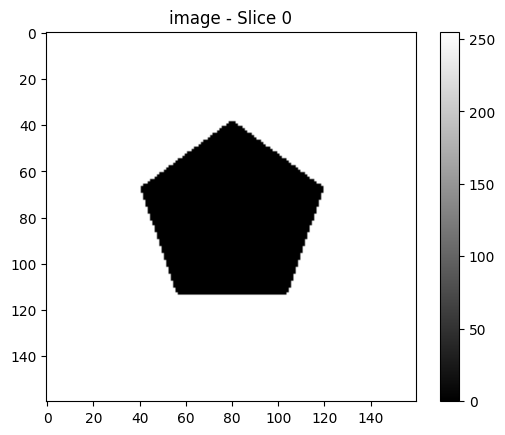

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load the RAVEN dataset file
data_path = '/Users/andylee/Projects/raven-cvpr/output/center_single/RAVEN_0_train.npz'
data = np.load(data_path)

# Print available arrays in the file
print("Available arrays in the file:", list(data.keys()))

# Visualize a specific array
array_names = ['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']
array_name = 'image'  # Replace with the actual array name you want to visualize
array_data = data[array_name]

# Check if the array is 2D or 3D
if array_data.ndim == 2:
    plt.imshow(array_data, cmap='gray')
    plt.title(array_name)
    plt.colorbar()
    plt.show()
elif array_data.ndim == 3:
    # If it's a 3D array, you might want to visualize a specific slice
    slice_index = 0  # Change this to visualize different slices
    plt.imshow(array_data[slice_index], cmap='gray')
    plt.title(f"{array_name} - Slice {slice_index}")
    plt.colorbar()
    plt.show()
else:
    print(f"Array {array_name} has {array_data.ndim} dimensions, which might not be directly visualizable.")

## Dislay Raven matrices
I ran the example generation script to generate Raven puzzles and this is a way to visualize them.

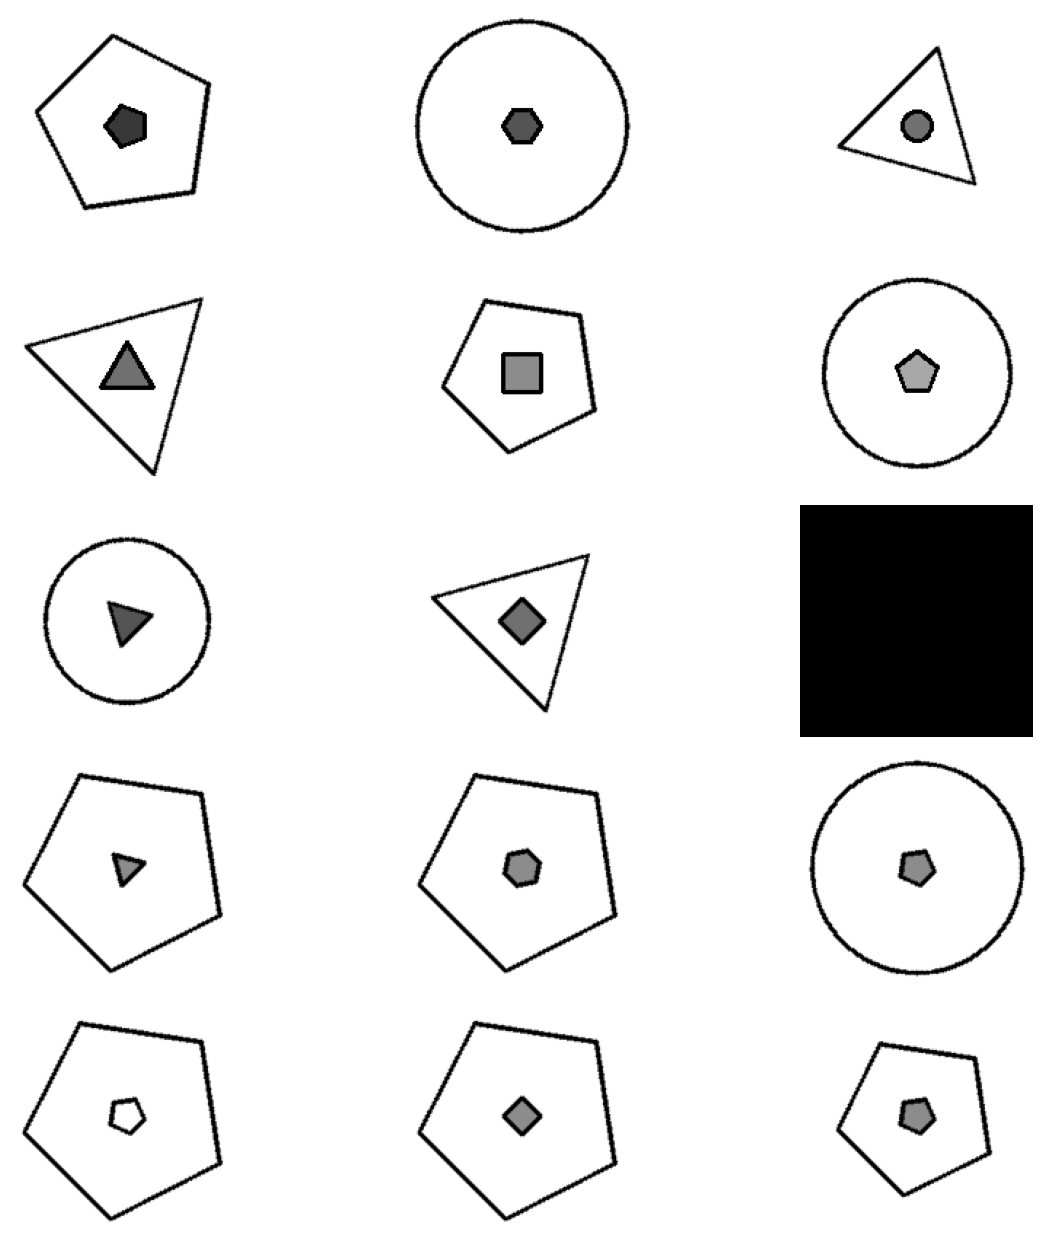

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
npz_file = "/Users/andylee/Projects/raven-cvpr/output/RAVEN_66_test.npz"
data = np.load(npz_file)

# Get the image data (contains all 16 panels)
image_data = data['image']

# Visualize the complete problem
plt.figure(figsize=(12, 15))

# Create the 3×3 problem matrix (first 8 panels + blank)
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < 8:  # First 8 panels
            plt.subplot(6, 3, i * 3 + j + 1)
            plt.imshow(image_data[idx], cmap='gray')
            plt.axis('off')
        else:  # The blank panel (bottom right of the problem matrix)
            plt.subplot(6, 3, 9)
            plt.imshow(np.ones((160, 160)) * 255, cmap='gray')
            plt.axis('off')

# Create the 2×4 answer choices (last 8 panels)
for i in range(2):
    for j in range(4):
        idx = 8 + i * 4 + j  # Start from index 8
        plt.subplot(6, 3, 3 * (i + 3) + (j % 3) + 1)
        plt.imshow(image_data[idx], cmap='gray')
        plt.axis('off')

plt.tight_layout()
plt.show()

## Panel Intuition
Panels are single visuals and represent a single AoT (And-Or-Tree). The code below starts with simple panels and slowly builds them up to build intuition. 

In [66]:

import sys
import os

# temporary hack to enable us to get access to raven-cvpr code
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')


# Import necessary modules
from const import IMAGE_SIZE, NUM_VALUES
from Attribute import Number, Position, Type, Uniformity
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression
from rendering import render_panel
from build_tree import (build_center_single,
                        build_distribute_four,
                        build_in_distribute_four_out_center_single,
                        build_left_center_single_right_center_single)
import matplotlib.pyplot as plt
import numpy as np

def visualize_panel(panel):
    
    # Render the panel
    panel_img = render_panel(panel)
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(panel_img, cmap='gray')
    plt.title("Tree structure")
    plt.axis('off')
    plt.show()


def build_single_entity(position_value, layout_entity_constraint):
    entity = Entity(name="0", bbox=position_value, entity_constraint=layout_entity_constraint)
    entity.type.value_level = 1 # Controls shape
    entity.size.value_level = 4  # Medium size
    entity.color.value_level = 2  # Black
    return entity


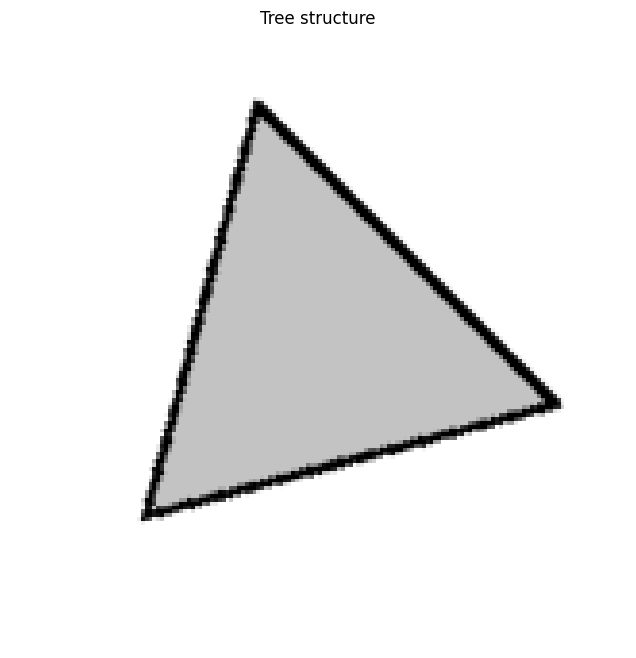

In [67]:


def build_one_shape_panel():
    # Build a center_single tree
    # tree = build_center_single()
    tree = build_center_single()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Find the entity in the tree
    structure = tree.children[0]  # First child of root is Structure
    component = structure.children[0]  # First child of Structure is Layout
    layout = component.children[0]  # First child of Layout is Entity

    # Set up the number and position
    layout.number.value_level = 3  # One entity
    layout.position.sample(1)  # Sample 1 position
    
    # Step 3: Create the entity (triangle)
    position_values = layout.position.get_value()
    position_value = position_values[0]
    layout_entity_constraint = layout.entity_constraint
    entity = build_single_entity(position_value, layout_entity_constraint)

    # Step 4: Add the entity to the layout
    layout.insert(entity)
    return tree

    
# Run the example
single_panel = build_one_shape_panel()
visualize_panel(single_panel)

Total structures:  1
Total components:  2


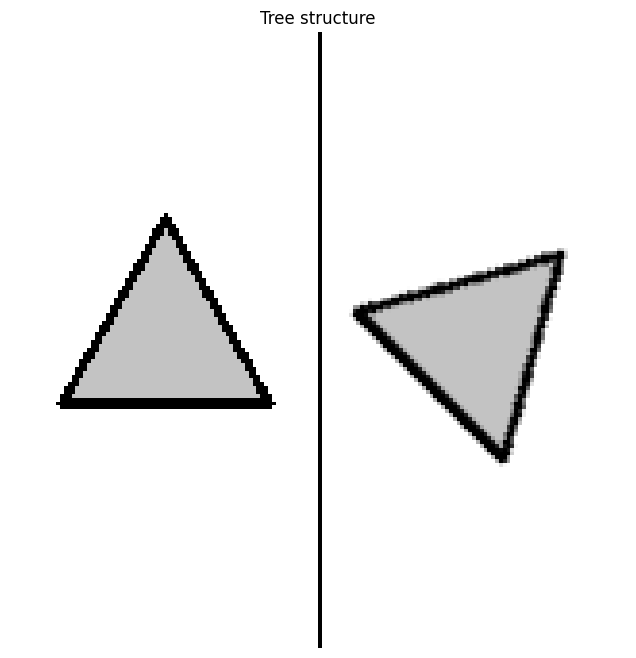

In [68]:
def build_two_shape_panel():
    # Build a center_single tree
    tree = build_left_center_single_right_center_single()
    # tree = build_in_distribute_four_out_center_single()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Access the nodes of the trees
    print("Total structures: ", len(tree.children))
    structure = tree.children[0]  # First child of root is Structure

    print("Total components: ", len(structure.children))
    left_component = structure.children[0]  
    right_component = structure.children[1]  

    left_layout = left_component.children[0]
    right_layout = right_component.children[0]

    # Set up the number and position
    left_layout.number.value_level = 0  # One entity in left layout
    left_layout.position.sample(1)  # Sample 1 position
    right_layout.number.value_level = 0  # One entity
    right_layout.position.sample(1)  # Sample 1 position
    
    # Step 3: Create the entity (triangle)
    left_position_values = left_layout.position.get_value()
    left_layout_entity_constraint = left_layout.entity_constraint
    left_entity = build_single_entity(left_position_values[0], left_layout_entity_constraint)
    left_layout.insert(left_entity)

    right_position_values = right_layout.position.get_value()
    right_layout_entity_constraint = right_layout.entity_constraint
    right_entity = build_single_entity(right_position_values[0], right_layout_entity_constraint)
    right_layout.insert(right_entity)

    # print("Total layouts (left): ", len(left_layout.children))
    # print("Total layouts (right): ", len(right_layout.children))
    # left_layout = left_component.children[0]  # First child of Layout is Entity
    # right_layout = right_component.children[0]  # First child of Layout is Entity

    # Set up the number and position
    return tree

two_shape_panel = build_two_shape_panel()
visualize_panel(two_shape_panel)

In [64]:
def build_four_shape_panel():
    # Build a center_single tree
    tree = build_distribute_four()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Access the nodes of the trees
    print("Total structures: ", len(tree.children))
    structure = tree.children[0]  # First child of root is Structure

    print("Total components: ", len(structure.children))
    component = structure.children[0]

    print("Total layouts: ", len(component.children))
    layout = component.children[0]

    # Handle 4 positions
    layout.number.value_level = 3 # 4 entities (0-index)
    layout.position.sample(4)

    # Get positions
    position_values = layout.position.get_value()
    print("Total Position values: ", len(position_values))

    # Build 4 entities
    for i in range(4):
        position_value = position_values[i]
        layout_entity_constraint = layout.entity_constraint
        entity = build_single_entity(position_value, layout_entity_constraint)
        layout.insert(entity)

    return tree

panel = build_four_shape_panel()
    

Total structures:  1
Total components:  1
Total layouts:  1
Total Position values:  4


## Manually create raven test
In this prototype code, we build a single Raven test without any rules, just hard-coded structures.

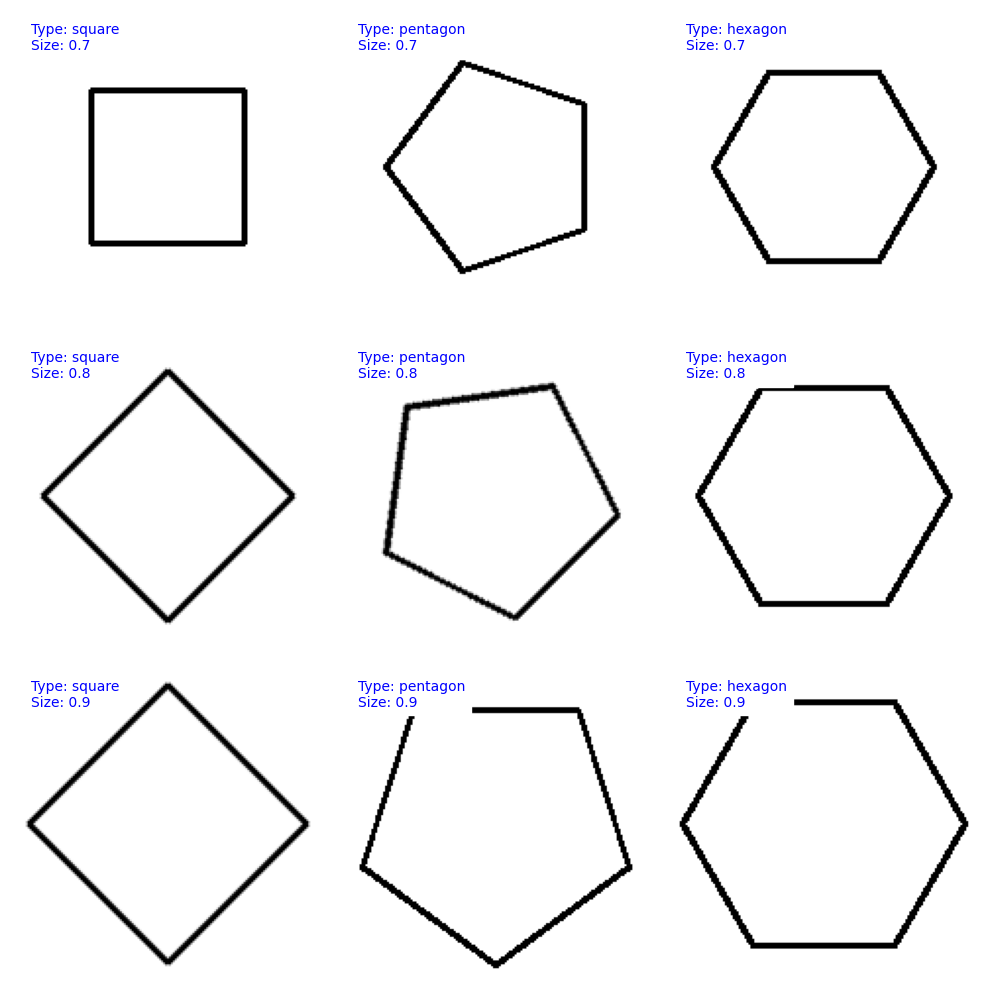

In [6]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from const import IMAGE_SIZE
from Attribute import Number, Position, Type, Uniformity
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression
from rendering import render_panel
from build_tree import build_center_single
import matplotlib.pyplot as plt
import numpy as np
import copy

def create_raven_matrix():
    # Function to create a fully initialized panel with entity
    def create_panel_with_entity(type_level, size_level):
        panel = build_center_single()
        panel.is_pg = True
        
        # Access the structure elements
        structure = panel.children[0]
        component = structure.children[0]
        layout = component.children[0]
        
        # Setup position and number
        layout.number.value_level = 0  # One entity
        layout.position.sample(1)
        position_values = layout.position.get_value()
        
        # Create entity with specified attributes
        entity = Entity(name="0", bbox=position_values[0], entity_constraint=layout.entity_constraint)
        entity.type.value_level = type_level
        entity.size.value_level = size_level
        entity.color.value_level = 0  # Black
        layout.insert(entity)
        
        return panel
    
    # First, create all panels manually to ensure they have the right structure
    panels = []
    
    # Define the attribute progression
    type_levels = [2, 3, 4]  # Triangle, Square, Circle
    size_levels = [3, 4, 5]  # Small, Medium, Large
    
    # Create all 9 panels with the right attribute combinations
    for row in range(3):
        row_panels = []
        for col in range(3):
            panel = create_panel_with_entity(type_levels[col], size_levels[row])
            row_panels.append(panel)
        panels.append(row_panels)
    
    # Render the 3x3 matrix (using our manually created panels)
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    
    for i in range(3):
        for j in range(3):
            panel_img = render_panel(panels[i][j])
            axs[i, j].imshow(panel_img, cmap='gray')
            axs[i, j].axis('off')
            
            # Label the attributes
            entity = panels[i][j].children[0].children[0].children[0].children[0]
            type_value = entity.type.get_value()
            size_value = entity.size.get_value()
            attr_text = f"Type: {type_value}\nSize: {size_value}"
            axs[i, j].text(10, 20, attr_text, color='blue', backgroundcolor='white')
    
    plt.tight_layout()
    plt.show()

# Run the example
create_raven_matrix()

# Rule Progression
This shows a rule progression on a matrix

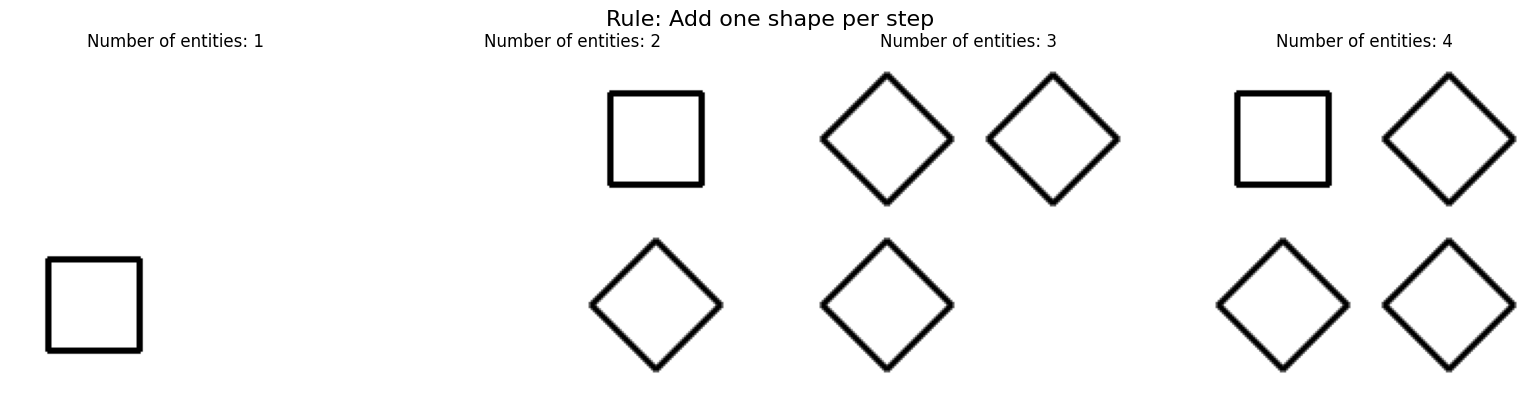

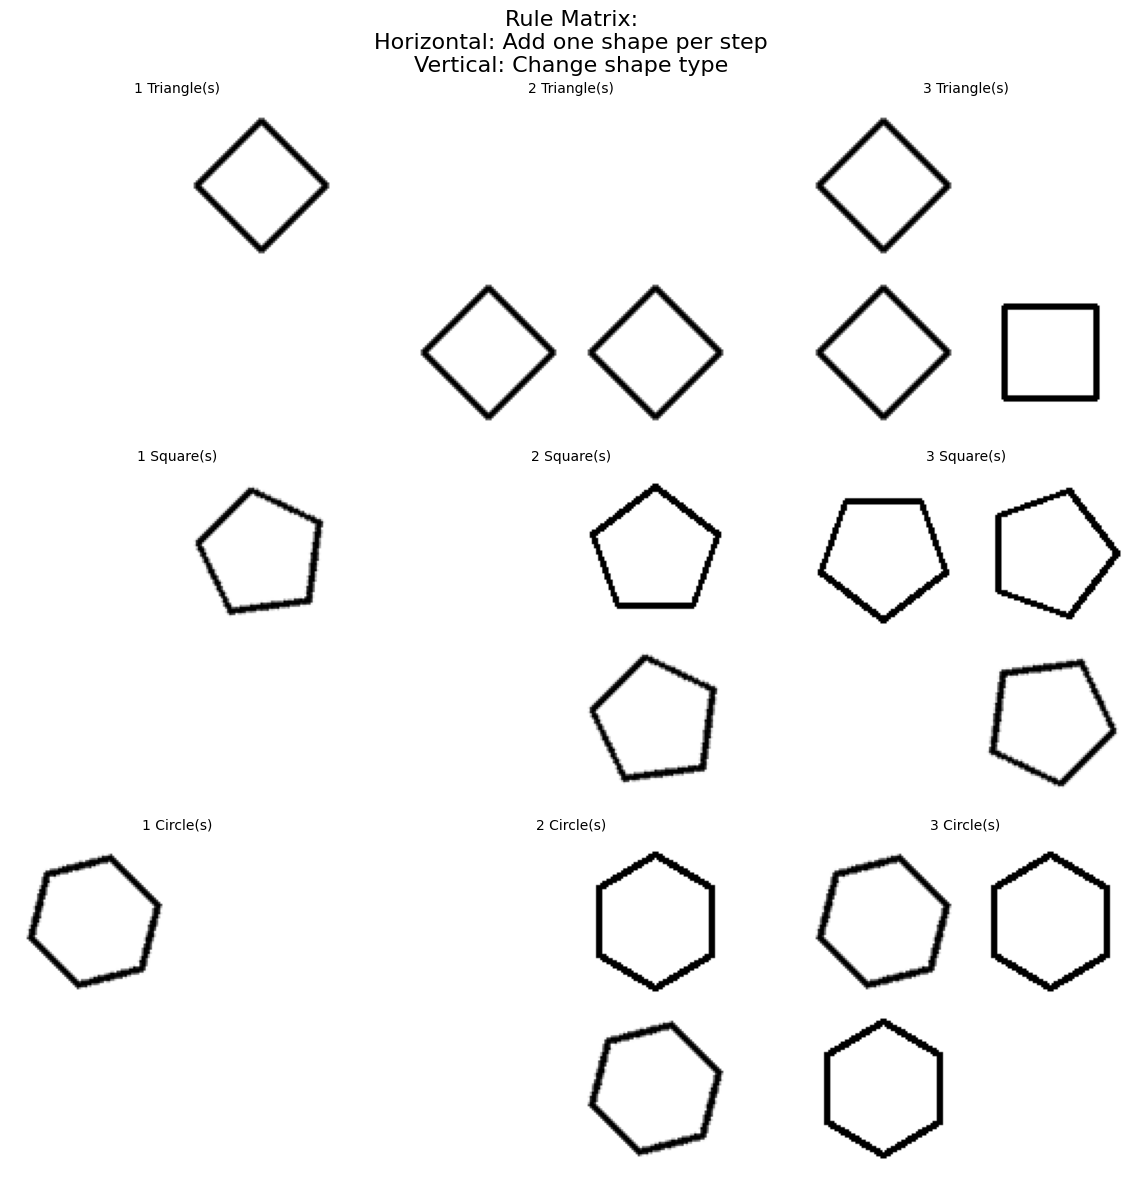

In [7]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from const import IMAGE_SIZE
from Attribute import Number, Position, Type, Uniformity
from AoT import Root, Structure, Component, Layout, Entity
from rendering import render_panel
from build_tree import build_distribute_four  # Using a layout that supports multiple entities
import matplotlib.pyplot as plt
import numpy as np
import copy

def visualize_number_progression():
    # Create panels showing a progression of adding one shape at a time
    
    # Function to create a panel with a specific number of entities
    def create_panel_with_n_entities(num_entities):
        # Use distribute_four which can show up to 4 entities in a 2x2 grid
        panel = build_distribute_four()
        panel.is_pg = True
        
        # Access the structure elements
        structure = panel.children[0]
        component = structure.children[0]
        layout = component.children[0]
        
        # Set the number of entities (0-indexed, so 0=1 entity, 1=2 entities, etc.)
        layout.number.value_level = num_entities - 1
        
        # Sample positions for the entities
        layout.position.sample(num_entities)
        position_values = layout.position.get_value()
        
        # Create entities at each position
        for i in range(num_entities):
            entity = Entity(name=str(i), bbox=position_values[i], entity_constraint=layout.entity_constraint)
            entity.type.value_level = 2  # Triangle
            entity.size.value_level = 4  # Medium
            entity.color.value_level = 0  # Black
            layout.insert(entity)
        
        return panel
    
    # Create a series of panels with an increasing number of shapes
    panels = []
    for num_entities in range(1, 5):  # Create 4 panels with 1, 2, 3, and 4 entities
        panel = create_panel_with_n_entities(num_entities)
        panels.append(panel)
    
    # Render the progression in a row
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    
    for i, panel in enumerate(panels):
        panel_img = render_panel(panel)
        axs[i].imshow(panel_img, cmap='gray')
        axs[i].axis('off')
        
        # Label each panel with the number of entities
        num_entities = len(panel.children[0].children[0].children[0].children)
        axs[i].set_title(f"Number of entities: {num_entities}", fontsize=12)
    
    plt.suptitle("Rule: Add one shape per step", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Now let's demonstrate a 3x3 matrix with multiple progressions
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))
    
    # In this 3x3 matrix:
    # - Number increases horizontally (1→2→3)
    # - Type changes vertically (Triangle→Square→Circle)
    
    for row in range(3):
        type_level = row + 2  # 2=Triangle, 3=Square, 4=Circle
        
        for col in range(3):
            num_entities = col + 1  # 1, 2, or 3 entities
            
            # Create panel with specified number and type
            panel = build_distribute_four()
            panel.is_pg = True
            
            structure = panel.children[0]
            component = structure.children[0]
            layout = component.children[0]
            
            layout.number.value_level = num_entities - 1
            layout.position.sample(num_entities)
            position_values = layout.position.get_value()
            
            for i in range(num_entities):
                entity = Entity(name=str(i), bbox=position_values[i], entity_constraint=layout.entity_constraint)
                entity.type.value_level = type_level
                entity.size.value_level = 4  # Medium
                entity.color.value_level = 0  # Black
                layout.insert(entity)
            
            # Render the panel
            panel_img = render_panel(panel)
            axs[row, col].imshow(panel_img, cmap='gray')
            axs[row, col].axis('off')
            
            # Add description
            type_names = {2: "Triangle", 3: "Square", 4: "Circle"}
            axs[row, col].set_title(f"{num_entities} {type_names[type_level]}(s)", fontsize=10)
    
    plt.suptitle("Rule Matrix:\nHorizontal: Add one shape per step\nVertical: Change shape type", fontsize=16)
    plt.tight_layout()
    plt.show()

# Run the example
visualize_number_progression()

In [12]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from Attribute import Type
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression
from rendering import render_panel
from build_tree import build_center_single
import matplotlib.pyplot as plt
import copy

def simple_rule_demo():
    # 1. Create a base tree
    base_tree = build_center_single()
    
    # 2. Sample it to get a properly initialized panel
    panel1 = base_tree.sample()
    
    # 3. Create a type progression rule
    type_rule = Progression("Type", 0, 1, 3)  # Type, component 0, step 1
    
    # 4. Apply the rule twice to create a progression
    panel2 = type_rule.apply_rule(panel1)
    panel3 = type_rule.apply_rule(panel2)
    
    # 5. Visualize the progression
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    panels = [panel1, panel2, panel3]
    for i, panel in enumerate(panels):
        # Render the panel
        panel_img = render_panel(panel)
        axs[i].imshow(panel_img, cmap='gray')
        axs[i].axis('off')
        
        # Get the type of the entity
        entity = panel.children[0].children[0].children[0].children[0]
        type_value = entity.type.get_value()
        axs[i].set_title(f"Panel {i+1}: Type = {type_value}", fontsize=12)
    
    plt.suptitle("Simple Type Progression", fontsize=16)
    plt.tight_layout()
    plt.show()

# Run the example
simple_rule_demo()

Aot before: Root.Scene


IndexError: list index out of range

Base tree structure:
Root children count: 1
Structure children count: 1

After sampling:
Panel is_pg: True
Panel children count: 1
Structure name: Singleton
Structure children count: 1
Component name: Grid
Component children count: 1
Layout name: Center_Single
Layout has 1 entities


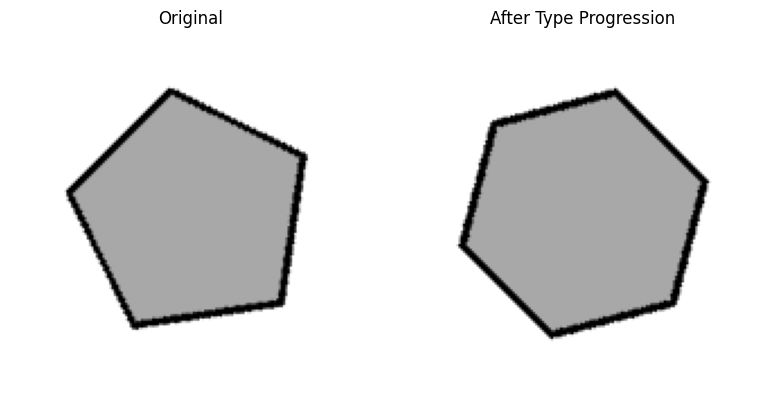


Trying with actual Progression rule:
Aot before: Root.Scene
Error: list index out of range
Panel: Root.Scene
First child: Structure.Singleton
First child's children count: 1


In [15]:
def debug_aot_structure():
    # Create a base tree
    base_tree = build_center_single()
    print("Base tree structure:")
    print(f"Root children count: {len(base_tree.children)}")
    if len(base_tree.children) > 0:
        print(f"Structure children count: {len(base_tree.children[0].children)}")
    
    # Sample to get initialized panel
    panel = base_tree.sample()
    print("\nAfter sampling:")
    print(f"Panel is_pg: {panel.is_pg}")
    print(f"Panel children count: {len(panel.children)}")
    
    if len(panel.children) > 0:
        structure = panel.children[0]
        print(f"Structure name: {structure.name}")
        print(f"Structure children count: {len(structure.children)}")
        
        if len(structure.children) > 0:
            component = structure.children[0]
            print(f"Component name: {component.name}")
            print(f"Component children count: {len(component.children)}")
            
            if len(component.children) > 0:
                layout = component.children[0]
                print(f"Layout name: {layout.name}")
                print(f"Layout has {len(layout.children)} entities")

  # Instead of Progression, let's create our own version of the rule
    # that manually handles the structure correctly
    def manual_apply_rule(panel):
        # Create a deep copy
        new_panel = copy.deepcopy(panel)
        
        # First, ensure we have the right structure
        if len(new_panel.children) == 0:
            print("ERROR: Panel has no children (Structure)")
            return None
            
        structure = new_panel.children[0]
        if len(structure.children) == 0:
            print("ERROR: Structure has no children (Component)")
            return None
            
        component = structure.children[0]
        if len(component.children) == 0:
            print("ERROR: Component has no children (Layout)")
            return None
            
        layout = component.children[0]
        
        # Now apply a type progression
        for entity in layout.children:
            # Increment type by 1
            entity.type.value_level = (entity.type.value_level + 1) % 5
            
        return new_panel
    
    # Apply our manual rule
    next_panel = manual_apply_rule(panel)
    
    # Visualize before and after
    if next_panel:
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        
        # Original
        panel_img = render_panel(panel)
        axs[0].imshow(panel_img, cmap='gray')
        axs[0].set_title("Original")
        axs[0].axis('off')
        
        # After rule
        next_panel_img = render_panel(next_panel)
        axs[1].imshow(next_panel_img, cmap='gray')
        axs[1].set_title("After Type Progression")
        axs[1].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    # Now try with the actual Progression class
    print("\nTrying with actual Progression rule:")
    try:
        type_rule = Progression("Type", 0, 1, 3)
        next_panel = type_rule.apply_rule(panel)
        print("Success! Rule applied correctly.")
    except Exception as e:
        print(f"Error: {e}")
        # Print the structure that's causing problems
        print(f"Panel: {panel}")
        if hasattr(panel, 'children') and len(panel.children) > 0:
            print(f"First child: {panel.children[0]}")
            if hasattr(panel.children[0], 'children'):
                print(f"First child's children count: {len(panel.children[0].children)}")


debug_aot_structure()
    

In [22]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from Attribute import Type
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression, Rule_Wrapper
from rendering import render_panel
from build_tree import build_center_single, build_left_center_single_right_center_single
import matplotlib.pyplot as plt
import copy

def simple_rule_demo():
    # Create a base tree
    base_tree = build_in_distribute_four_out_center_single()
    
    # Sample it to get a properly initialized panel
    panel1 = base_tree.sample()
    
    # Create a type progression rule correctly
    # Method 1: Using Rule_Wrapper
    type_rule = Rule_Wrapper(name="Progression", attr="Number", param=[1], component_idx=0)
    
    # OR Method 2: Direct Progression constructor with correct parameters
    # type_rule = Progression("Progression", "Type", [1], 0)
    
    # Apply the rule twice to create a progression
    panel2 = type_rule.apply_rule(panel1)
    panel3 = type_rule.apply_rule(panel2)
    
    # Visualize the progression
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    panels = [panel1, panel2, panel3]
    for i, panel in enumerate(panels):
        # Render the panel
        panel_img = render_panel(panel)
        axs[i].imshow(panel_img, cmap='gray')
        axs[i].axis('off')
        
        # Get the type of the entity
        entity = panel.children[0].children[0].children[0].children[0]
        type_value = entity.type.get_value()
        axs[i].set_title(f"Panel {i+1}: Type = {type_value}", fontsize=12)
    
    plt.suptitle("Simple Type Progression", fontsize=16)
    plt.tight_layout()
    plt.show()

# Run the example
simple_rule_demo()

Aot before: Root.Scene


AssertionError: 

Aot before: Root.Scene
Aot before: Root.Scene
Aot before: Root.Scene


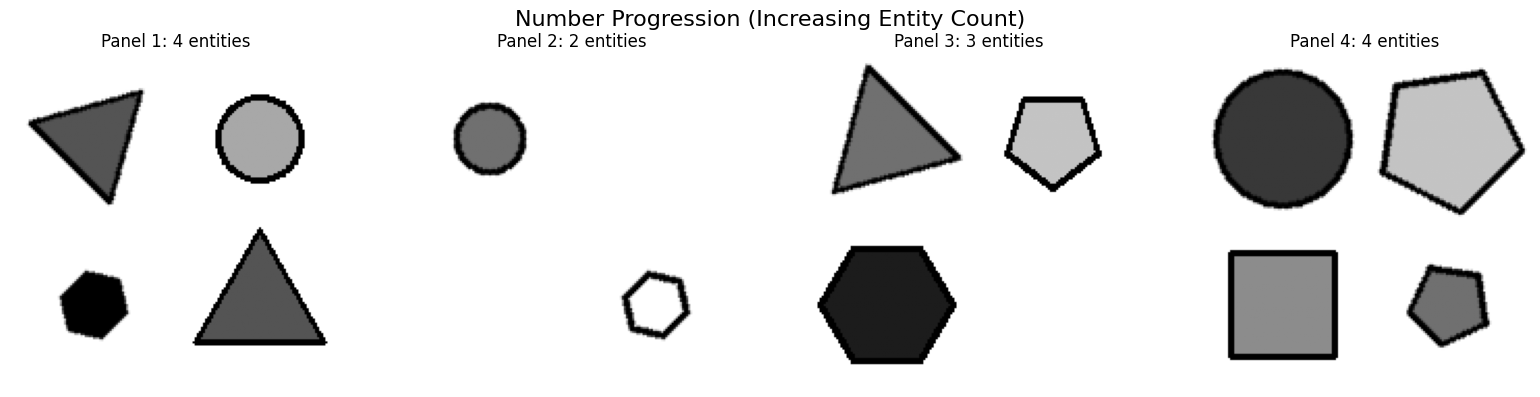

In [23]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from Attribute import Type
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Rule_Wrapper
from rendering import render_panel
from build_tree import build_distribute_four  # Using distribute_four which supports multiple entities
import matplotlib.pyplot as plt
import copy

def number_progression_demo():
    # Create a base tree that supports multiple entities
    base_tree = build_distribute_four()  # This supports up to 4 entities
    
    # Sample it to get a properly initialized panel
    panel1 = base_tree.sample()
    
    # Make sure the initial panel starts with 1 entity
    structure = panel1.children[0]
    component = structure.children[0]
    layout = component.children[0]
    
    # Set to 1 entity (value_level 0 = 1 entity in the 0-based indexing)
    layout.number.value_level = 0
    layout.position.sample(1)  # Sample positions for 1 entity
    
    # Make all entities have the same type for clarity
    for entity in layout.children:
        entity.type.value_level = 2  # Triangle
    
    # Create a NUMBER progression rule
    number_rule = Rule_Wrapper(name="Progression", attr="Number", param=[1], component_idx=0)
    
    # Apply the rule multiple times to increase the number of entities
    panel2 = number_rule.apply_rule(panel1)  # Should have 2 entities
    panel3 = number_rule.apply_rule(panel2)  # Should have 3 entities
    panel4 = number_rule.apply_rule(panel3)  # Should have 4 entities
    
    # Visualize the progression
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    
    panels = [panel1, panel2, panel3, panel4]
    for i, panel in enumerate(panels):
        # Render the panel
        panel_img = render_panel(panel)
        axs[i].imshow(panel_img, cmap='gray')
        axs[i].axis('off')
        
        # Count entities
        num_entities = len(panel.children[0].children[0].children[0].children)
        axs[i].set_title(f"Panel {i+1}: {num_entities} entities", fontsize=12)
    
    plt.suptitle("Number Progression (Increasing Entity Count)", fontsize=16)
    plt.tight_layout()
    plt.show()

# Run the example
number_progression_demo()

Aot before: Root.Scene
Aot before: Root.Scene


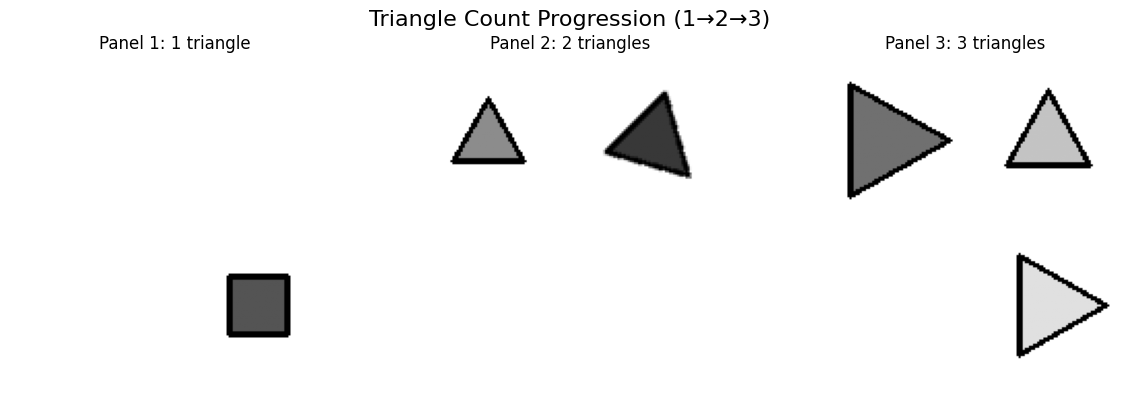

In [29]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from Attribute import Type
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Rule_Wrapper
from rendering import render_panel
from build_tree import build_distribute_four  # Must use this instead of build_center_single
import matplotlib.pyplot as plt
import copy

def triangle_count_progression():
    # 1. Create a base tree that supports multiple entities
    base_tree = build_distribute_four()  # Supports up to 4 entities
    
    # 2. Sample it to get a properly initialized panel
    panel1 = base_tree.sample()
    
    # 3. Ensure the first panel has exactly 1 triangle
    structure = panel1.children[0]
    component = structure.children[0]
    layout = component.children[0]
    
    # Set to 1 entity
    layout.number.value_level = 0  # 0 = 1 entity
    layout.position.sample(1)
    # After initializing the first panel, set uniformity to True
    layout.uniformity.value_level = 1  # 1 = True, 0 = False
    
    # Make sure it's a triangle
    for entity in layout.children:
        entity.type.value_level = 2  # Triangle (Type.Triangle)
    
    # 4. Create a Number progression rule
    number_rule = Rule_Wrapper("Progression", "Number", [1], 0)
    
    # 5. Apply the rule to create panels with increasing triangles
    panel2 = number_rule.apply_rule(panel1)  # 2 triangles
    panel3 = number_rule.apply_rule(panel2)  # 3 triangles
    
    # 6. Make sure all entities are triangles
    # (Since the rule might generate new entities with random types)
    for panel in [panel2, panel3]:
        layout = panel.children[0].children[0].children[0]
        for entity in layout.children:
            entity.type.value_level = 1  # Triangle
    
    # 7. Visualize the progression
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    panels = [panel1, panel2, panel3]
    for i, panel in enumerate(panels):
        # Render the panel
        panel_img = render_panel(panel)
        axs[i].imshow(panel_img, cmap='gray')
        axs[i].axis('off')
        
        # Count entities
        num_entities = len(panel.children[0].children[0].children[0].children)
        axs[i].set_title(f"Panel {i+1}: {num_entities} triangle{'s' if num_entities > 1 else ''}", fontsize=12)
    
    plt.suptitle("Triangle Count Progression (1→2→3)", fontsize=16)
    plt.tight_layout()
    plt.show()

# Run the example
triangle_count_progression()